In [1]:
import pandas as pd

In [ ]:
kegg = pd.read_excel("Pathway_nodes.xlsx", 
                        sheet_name = "kegg", 
                        index_col = 0)


In [3]:
kegg

,Gene Type,User Id,Expression Value,Unnamed: 4,Symbol
Gene Name,,,,,
argininosuccinate synthase 1(ASS1),User gene in pathway,ASS1,NaN,NaN,ASS1
"carbamoyl-phosphate synthetase 2, aspartate transcarbamylase, and dihydroorotase(CAD)",User gene in pathway,CAD,NaN,NaN,CAD
glutamate dehydrogenase 1(GLUD1),User gene in pathway,GLUD1,NaN,NaN,GLUD1
glutamic--pyruvic transaminase 2(GPT2),User gene in pathway,GPT2,NaN,NaN,GPT2
glutamic-oxaloacetic transaminase 2(GOT2),User gene in pathway,GOT2,NaN,NaN,GOT2
glutaminase(GLS),User gene in pathway,GLS,NaN,NaN,GLS
ABHD14A-ACY1 readthrough(ABHD14A-ACY1),Other gene in pathway,NaN,NaN,NaN,ABHD14A-ACY1
aminoacylase 1(ACY1),Other gene in pathway,NaN,NaN,NaN,ACY1
arginase 1(ARG1),Other gene in pathway,NaN,NaN,NaN,ARG1


In [ ]:
reactome = pd.read_excel("Pathway_nodes.xlsx", 
                        sheet_name = "reactome", 
                        index_col = 0)

In [10]:
reactome

,Symbol
NaN,"(3S)-3-hydroxy-N(6),N(6),N(6)-trimethyl-L-lysi..."
NaN,glycine zwitterion
NaN,4-trimethylammoniobutanal
NaN,(R)-carnitine
NaN,L-ascorbate
...,...
NaN,ENSEMBL:ENSG00000036473 OTC
NaN,ENSEMBL:ENSG00000021826 CPS1
NaN,ENSEMBL:ENSG00000118520 ARG1
NaN,sulfanegen [Guide to Pharmacology:9830]


In [6]:
reactome.columns

Index(['Symbol', 'MoleculeType', 'Unnamed: 3'], dtype='object')

In [ ]:
wikipathways = pd.read_excel("Pathway_nodes.xlsx", 
                        sheet_name = "wiki", 
                        index_col = 0)

In [12]:
wikipathways

,Symbol
NaN,OH-indole acetaldehyde
NaN,Ethanol
NaN,Methionine
NaN,Indoleacetate
NaN,Aconitate
...,...
NaN,ACSS1
NaN,CPS1
NaN,SRM
NaN,HADH


In [16]:
PKG = pd.read_excel("../PKG_nodes_extracted.xlsx", 
                    sheet_name = "Sheet2",
                        index_col = 0)

In [17]:
PKG

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Symbol
ALL,,,,
p(HGNC:'ALAS1'),NaN,NaN,NaN,ALAS1
p(HGNC:'HMOX1'),NaN,NaN,NaN,HMOX1
p(HGNC:'PLCD1'),NaN,NaN,NaN,PLCD1
p(HGNC:'HAMP'),NaN,NaN,NaN,HAMP
p(HGNC:'ALAD'),NaN,NaN,NaN,ALAD
...,...,...,...,...
a(CHEMBL:'clodronate'),NaN,NaN,NaN,NaN
a(CHEMBL:'hydroxyproline'),NaN,NaN,NaN,NaN
p(PFAM:'Ferritin'),NaN,NaN,NaN,NaN


In [13]:
import pandas as pd

def symbol_sets(df, col="Symbol"):
    # robust: handle missing col, whitespace, NaNs, duplicates
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found. Available: {list(df.columns)}")
    s = (
        df[col]
        .astype(str)                  # in case symbols are not strings
        .str.strip()                  # remove whitespace
        .replace({"nan": pd.NA})      # if NaN became "nan"
        .dropna()
    )
    return set(s)

def overlap_report(df1, df2, df3, col="Symbol"):
    s1 = symbol_sets(df1, col)
    s2 = symbol_sets(df2, col)
    s3 = symbol_sets(df3, col)

    # counts (unique symbols)
    counts_unique = {
        "df1_unique": len(s1),
        "df2_unique": len(s2),
        "df3_unique": len(s3),
    }

    # intersections (sets + counts)
    common_12 = s1 & s2
    common_13 = s1 & s3
    common_23 = s2 & s3
    common_123 = s1 & s2 & s3

    counts_overlap = {
        "common_df1_df2": len(common_12),
        "common_df1_df3": len(common_13),
        "common_df2_df3": len(common_23),
        "common_all_3": len(common_123),
    }

    # if you also want raw row counts (including duplicates / NaNs), use this:
    row_counts = {
        "df1_rows_nonnull": int(df1[col].notna().sum()),
        "df2_rows_nonnull": int(df2[col].notna().sum()),
        "df3_rows_nonnull": int(df3[col].notna().sum()),
    }

    results = {
        "row_counts": row_counts,
        "unique_counts": counts_unique,
        "overlap_counts": counts_overlap,
        "common_kegg_reactome": sorted(common_12),
        "common_kegg_wikipathways": sorted(common_13),
        "common_reactome_wikipathways": sorted(common_23),
        "common_all_3": sorted(common_123),
    }
    return results, (s1, s2, s3)

# --- usage ---
# assuming your dataframes are df1, df2, df3
results, (s1, s2, s3) = overlap_report(kegg, reactome, wikipathways, col="Symbol")

print("Row counts (non-null):", results["row_counts"])
print("Unique symbol counts:", results["unique_counts"])
print("Overlap counts:", results["overlap_counts"])

print("\nCommon to all 3 :", results["common_all_3"])


Row counts (non-null): {'df1_rows_nonnull': 47, 'df2_rows_nonnull': 648, 'df3_rows_nonnull': 203}
Unique symbol counts: {'df1_unique': 47, 'df2_unique': 647, 'df3_unique': 203}
Overlap counts: {'common_df1_df2': 16, 'common_df1_df3': 14, 'common_df2_df3': 47, 'common_all_3': 11}

Common to all 3 : ['ARG1', 'ARG2', 'ASS1', 'CPS1', 'GLS', 'GLUD1', 'GLUL', 'GOT1', 'GOT2', 'GPT2', 'OTC']


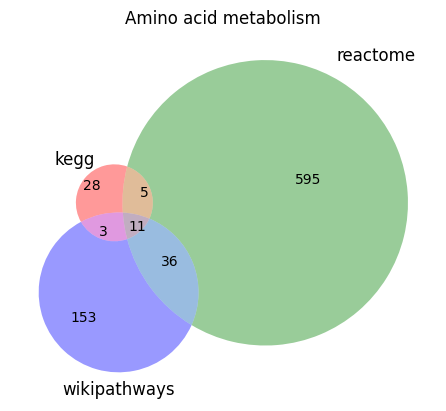

In [14]:
import matplotlib.pyplot as plt

try:
    from matplotlib_venn import venn3
except ImportError as e:
    raise ImportError(
        "You need matplotlib-venn for the Venn diagram.\n"
        "Install with: pip install matplotlib-venn"
    ) from e

plt.figure()
venn3([s1, s2, s3], set_labels=("kegg", "reactome", "wikipathways"))
plt.title("Amino acid metabolism")
plt.savefig('Amino acid metabolism.png', format='png', dpi=600)
plt.show()


In [18]:
import pandas as pd

def symbol_sets(df, col="Symbol"):
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found. Available: {list(df.columns)}")
    s = (
        df[col]
        .astype(str)
        .str.strip()
        .replace({"nan": pd.NA})
        .dropna()
    )
    return set(s)

def overlap_report_4(df1, df2, df3, df4, col="Symbol"):
    s1 = symbol_sets(df1, col)
    s2 = symbol_sets(df2, col)
    s3 = symbol_sets(df3, col)
    s4 = symbol_sets(df4, col)

    unique_counts = {
        "df1_unique": len(s1),
        "df2_unique": len(s2),
        "df3_unique": len(s3),
        "df4_unique": len(s4),
    }

    row_counts = {
        "df1_rows_nonnull": int(df1[col].notna().sum()),
        "df2_rows_nonnull": int(df2[col].notna().sum()),
        "df3_rows_nonnull": int(df3[col].notna().sum()),
        "df4_rows_nonnull": int(df4[col].notna().sum()),
    }

    # pairwise intersections
    pairs = {
        "common_df1_df2": s1 & s2,
        "common_df1_df3": s1 & s3,
        "common_df1_df4": s1 & s4,
        "common_df2_df3": s2 & s3,
        "common_df2_df4": s2 & s4,
        "common_df3_df4": s3 & s4,
    }

    # triple intersections
    triples = {
        "common_df1_df2_df3": s1 & s2 & s3,
        "common_df1_df2_df4": s1 & s2 & s4,
        "common_df1_df3_df4": s1 & s3 & s4,
        "common_df2_df3_df4": s2 & s3 & s4,
    }

    # all four
    common_all_4 = s1 & s2 & s3 & s4

    overlap_counts = {k: len(v) for k, v in pairs.items()}
    overlap_counts.update({k: len(v) for k, v in triples.items()})
    overlap_counts["common_all_4"] = len(common_all_4)

    results = {
        "row_counts": row_counts,
        "unique_counts": unique_counts,
        "overlap_counts": overlap_counts,
        **{k: sorted(v) for k, v in pairs.items()},
        **{k: sorted(v) for k, v in triples.items()},
        "common_all_4": sorted(common_all_4),
    }
    return results, (s1, s2, s3, s4)

# --- usage ---
# assuming your dataframes are df1, df2, df3, df4
results, (s1, s2, s3, s4) = overlap_report_4(kegg, reactome, wikipathways, PKG, col="Symbol")

print("Row counts (non-null):", results["row_counts"])
print("Unique symbol counts:", results["unique_counts"])
print("Overlap counts:", results["overlap_counts"])

print("\nCommon to all 4 :", results["common_all_4"])


Row counts (non-null): {'df1_rows_nonnull': 47, 'df2_rows_nonnull': 648, 'df3_rows_nonnull': 203, 'df4_rows_nonnull': 347}
Unique symbol counts: {'df1_unique': 47, 'df2_unique': 647, 'df3_unique': 203, 'df4_unique': 347}
Overlap counts: {'common_df1_df2': 16, 'common_df1_df3': 14, 'common_df1_df4': 4, 'common_df2_df3': 47, 'common_df2_df4': 10, 'common_df3_df4': 9, 'common_df1_df2_df3': 11, 'common_df1_df2_df4': 4, 'common_df1_df3_df4': 3, 'common_df2_df3_df4': 6, 'common_all_4': 3}

Common to all 4 : ['GLS', 'GOT1', 'OTC']


<Figure size 640x480 with 0 Axes>

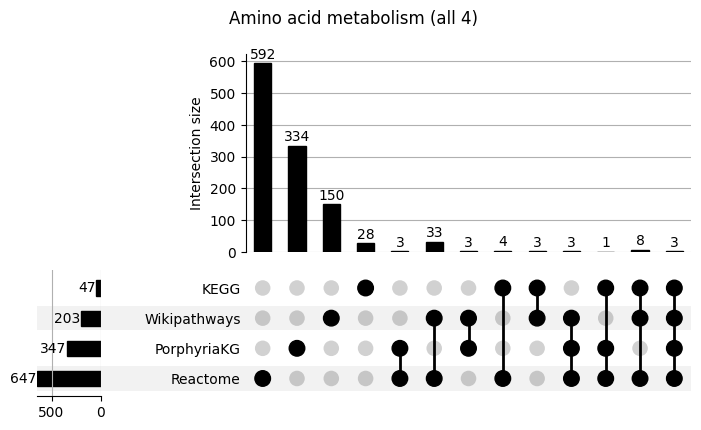

In [19]:
import matplotlib.pyplot as plt

# pip install upsetplot
from upsetplot import UpSet, from_contents

contents = {
    "KEGG": s1,
    "Reactome": s2,
    "Wikipathways": s3,
    "PorphyriaKG": s4,
}

data = from_contents(contents)
plt.figure()
UpSet(data, show_counts=True).plot()
plt.suptitle("Amino acid metabolism (all 4)")
plt.savefig('Aminoacidmetabolism_all4.png', format='png', dpi=600)
plt.show()

In [28]:
len(s1)

194